Here, we solve a simplified version of the Goldreich-Schubert Dispersion relation in order to find fastest growing modes for parameters we can use in our simulations.

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import sympy as sy
import numpy as np

In [4]:
sy.init_printing()

In [5]:
sigma, kt, kz, chi0, Omega, Pr, N, kappa = sy.symbols(['sigma','k_t','k_z','chi_0','Omega','Pr', 'N', 'kappa'])

This assumes a simplified version of GS that excludes $z$ dependence on $\Omega$ or the background thermal stratification. It limits to the Korykansky (1991) dispersion relation, if you correct for his typos.

In [6]:
disp = sigma**3 + sigma**2*kt**2*chi0/Omega * (1 + 2*Pr) + sigma*((kz/kt)**2*(N**2 + kappa**2)/Omega**2 + (2 + Pr)*Pr*chi0**2*kt**4/Omega**2) + kz**2 * chi0/Omega**3*(Pr*N**2 + kappa**2) + chi0**3 * Pr**2 * kt**6/Omega**3

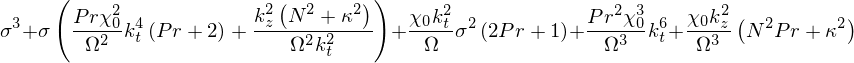

In [7]:
disp

`sy.solve` assumes the first argument is equal to zero; the second argument is the variable to solve for.

In [8]:
%%time
disp_solved = sy.solve(disp,sigma)

CPU times: user 1min 16s, sys: 179 ms, total: 1min 16s
Wall time: 1min 16s


In [9]:
branch_1 = disp_solved[0]
branch_2 = disp_solved[1]
branch_3 = disp_solved[2]

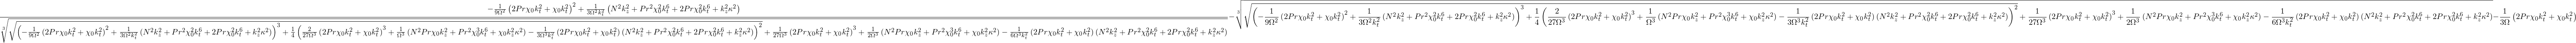

In [10]:
branch_1

Lambdify turns the sympy expression in to a numpy-ready computing thingy.

In [11]:
b1 = sy.lambdify([Pr, chi0, kt,kz,N,kappa,Omega],branch_1,"numpy")
b2 = sy.lambdify([Pr, chi0, kt,kz,N,kappa,Omega],branch_2,"numpy")
b3 = sy.lambdify([Pr, chi0, kt,kz,N,kappa,Omega],branch_3,"numpy")


In [20]:
kz = np.linspace(0.1,100,100000)

Here, we try a bunch of parameters. Since we use $\mathrm{Re} = R_1 \Omega_1 \delta/\nu$ as our TC control parameter, we set $\nu$ and $\mathrm{Pr}$, and then compute $\chi$. Here, $\kappa$ is a typical value from the TC flow with $\mu = 0.9425$ and $\eta = 0.99$.

In [21]:
# first parameters
#chi_v = 1e-3
#Pr_v = 0.3
#N_v = 2.
#kappa_v = np.sqrt(2)*1j
#Omega_v = 1.

# a potential kappa we can maintain constant in the TC device
nu_v = 1e-5
Pr_v = 0.3
chi_v = nu_v/Pr_v

Omega_v = 1./99.
N_v = np.sqrt(15.5) * Omega_v
kappa_v = np.sqrt(7.55)*1j * Omega_v

Lz_v = 2.0074074463832545
print("nu = {}; chi = {}".format(nu_v,chi_v))

# trying to reproduce GS67 
#chi_v = 1e-3
#Pr_v = 1/5.9e6
#Omega_v = 1
#N_v = np.sqrt(6.9e2)
#kappa_v = np.sqrt(20.)*1j

# trying to reproduce Korykansky fig 1
#chi_v = 1e-4
#Pr_v = 1e-6
#Omega_v = 1
#N_v = np.sqrt(1e4)
#kappa_v = 1j

bb1 =b1(Pr_v,chi_v,np.sqrt(2)*kz,kz,N_v,kappa_v,Omega_v)
bb2 =b2(Pr_v,chi_v,np.sqrt(2)*kz,kz,N_v,kappa_v,Omega_v)
bb3 =b3(Pr_v,chi_v,np.sqrt(2)*kz,kz,N_v,kappa_v,Omega_v)

nu = 1e-05; chi = 3.3333333333333335e-05


We're unstable if any of these are true

In [22]:
print((bb1.real > 0).any())
print((bb2.real > 0).any())
print((bb2.real > 0).any())

True
False
False


In [23]:
kz_scale = kz * Lz_v/2*np.pi

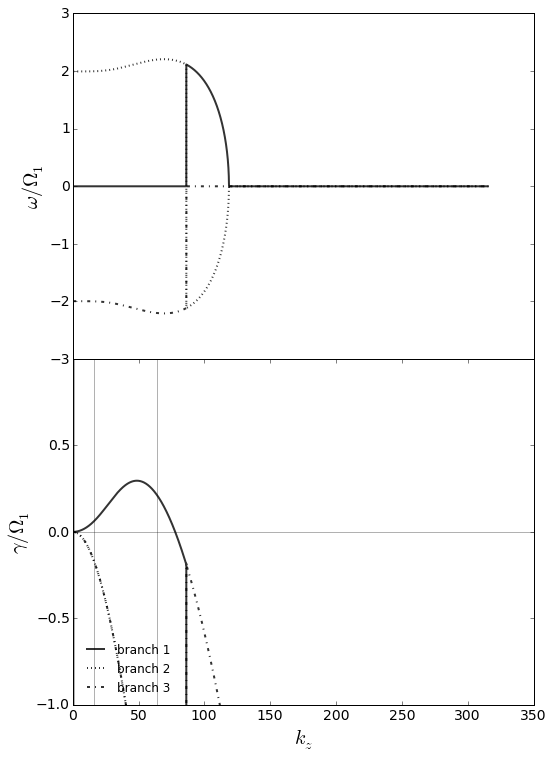

In [24]:
fig = plt.figure(figsize=(8,12))
real_ax = fig.add_axes([0.1,0.1,0.8,0.4])
imag_ax = fig.add_axes([0.1,0.5,0.8,0.4])
real_ax.plot(kz_scale,bb1.real,alpha=0.8,color='k',linestyle="-",linewidth=2, label='branch 1')
real_ax.plot(kz_scale,bb2.real,alpha=0.8,color='k',linestyle=":",linewidth=2, label='branch 2')
real_ax.plot(kz_scale,bb3.real,alpha=0.8,color='k',linestyle='-.',linewidth=2, label='branch 3')
real_ax.legend(loc='lower left').draw_frame(False)

real_ax.axhline(0,color='k',alpha=0.3)
real_ax.set_xlabel(r'$k_z$',size=20)
real_ax.set_ylabel(r'$\gamma/\Omega_1$',size=20)
real_ax.set_ylim(-1,1)
t = real_ax.yaxis.get_major_ticks()
t[-1].set_visible(False)

imag_ax.plot(kz_scale,bb1.imag,alpha=0.8,color='k',linestyle="-",linewidth=2)
imag_ax.plot(kz_scale,bb2.imag,alpha=0.8,color='k',linestyle=":",linewidth=2)
imag_ax.plot(kz_scale,bb3.imag,alpha=0.8,color='k',linestyle='-.',linewidth=2)

imag_ax.set_ylabel(r'$\omega/\Omega_1$',size=20)
imag_ax.xaxis.set_visible(False)
real_ax.axvline(16,color='k',alpha=0.3)
real_ax.axvline(64,color='k',alpha=0.3)
real_ax.axvline(1,color='k',alpha=0.3)


for ax in [real_ax,imag_ax]:
    ax.tick_params(labelsize=14)
    #ax.set_xscale('log')
    #ax.set_yscale('log')

In [25]:
max(bb1.real)

In [18]:
np.sqrt(20)*0.09

In [19]:
!hostname

kaiju
